# Chapter 5: Support Vector Machines

## Linear SVM Classification

Classifies by splitting groups by the largest possible linear separation

Soft margin classification allows some outliers to be misclassified when identifying the best separation

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [2]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss = "hinge"))
])

svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [3]:
svm_clf.predict([[5.5,1.7]])

array([1.])

## Nonlinear SVM Classification

Add polynomial featues to the SVM to create a nonlinear classifier

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
])

polynomial_svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

### Polynomial Kernel

Same result but computationally much faster to use a polynomial kernel to approximate addition of polynomial features



In [5]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

def plot_svm_curve(degree = 3):
    moons = make_moons()
    x = moons[0]
    y = moons[1]
    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = "poly", degree = degree, coef0=1, C = 5))
    ])

    poly_kernel_svm_clf.fit(x,y)

    grid_density = 100
    #x_scale = StandardScaler().fit_transform(x)
    x1lim = (0, max(x[:,0]))
    x1steps = np.linspace(x1lim[0], x1lim[1], num = grid_density)
    x2lim = (0, max(x[:,1]))
    x2steps = np.linspace(x2lim[0], x2lim[1], num = grid_density)

    dat = np.zeros((grid_density, grid_density))
    for i, ix in enumerate(x1steps):
        for j, jx, in enumerate(x2steps):
            dat[i,j] = poly_kernel_svm_clf.predict([[ix,jx]])[0]
    imgplt = plt.imshow(dat)
    plt.scatter(x[:,0], x[:,1], c = y)


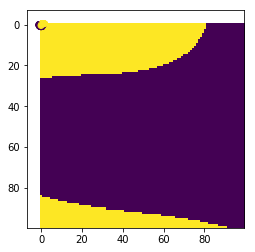

In [6]:
plot_svm_curve()

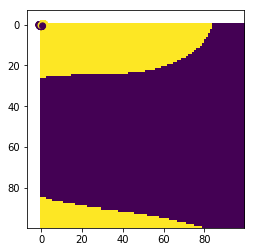

In [7]:
plot_svm_curve(degree = 5)

In [8]:
import pandas as pd
import seaborn as sns
import itertools
## Reimplement plot_svm_curve using pandas data structures
def plot_svm_curve_pd(mx, my, degree):

    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = "poly", degree = degree, coef0=1, C = 5))
    ])

    poly_kernel_svm_clf.fit(x,y)
    
    grid_density = 100
    
    x1lim = (min(x[:,0]), max(x[:,0]))
    x1steps = np.linspace(x1lim[0], x1lim[1], num = grid_density)
    x2lim = (min(x[:,1]), max(x[:,1]))
    x2steps = np.linspace(x2lim[0], x2lim[1], num = grid_density)

    steps = np.array(list(itertools.product(x1steps, x2steps)))
    dat = pd.DataFrame(steps, columns = ["x1", "x2"])

    func = lambda x: poly_kernel_svm_clf.predict([x])[0]
    dat["y_pred"] = dat.apply(func, axis = 1)
    dat.plot.scatter(x = "x1", y = "x2", c = "y_pred")
    plt.scatter(x[:,0], x[:,1], c = y)
    plt.title("Moons; deg = " + str(degree))

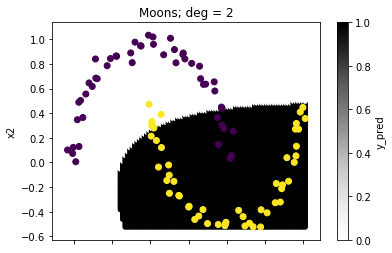

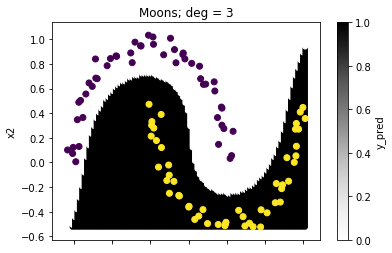

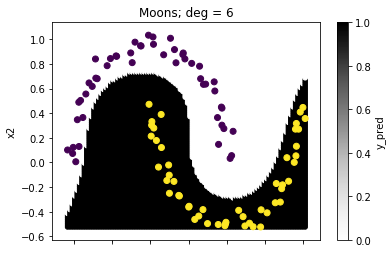

In [9]:
moons = make_moons(noise = 0.05)
x = moons[0]
y = moons[1]

plot_svm_curve_pd(x, y, degree = 2)
plot_svm_curve_pd(x, y, degree = 3)
plot_svm_curve_pd(x, y, degree = 6)

/Users/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


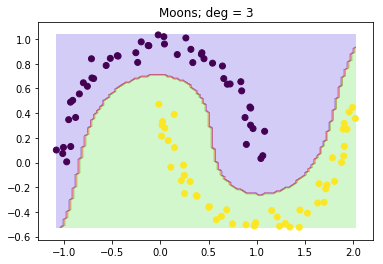

In [10]:
degree = 3
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = degree, coef0=1, C = 5))
])

poly_kernel_svm_clf.fit(x,y)

grid_density = 100

x1lim = (min(x[:,0]), max(x[:,0]))
x1steps = np.linspace(x1lim[0], x1lim[1], num = grid_density)
x2lim = (min(x[:,1]), max(x[:,1]))
x2steps = np.linspace(x2lim[0], x2lim[1], num = grid_density)

steps = np.array(list(itertools.product(x1steps, x2steps)))
dat = pd.DataFrame(steps, columns = ["x1", "x2"])

func = lambda x: poly_kernel_svm_clf.predict([x])[0]
dat["y_pred"] = dat.apply(func, axis = 1)

plt.contourf(x1steps, x2steps, dat["y_pred"].reshape((100,100)).T, cmap = plt.cm.brg, alpha = 0.2)
# dat.plot.scatter(x = "x1", y = "x2", c = "y_pred")
plt.scatter(x[:,0], x[:,1], c = y)
plt.title("Moons; deg = " + str(degree))
plt.show()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


#### Similarity Features

Adds featueres calculated from the Gaussian radial bias function relative to two or more landmarks. Can often make data set lineary seperable.

Often use every data point as a landmark, but this is computationally very expensive as it adds one feature per observation.

Can approximate using rbf kernel

In [11]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.01))
])

rbf_kernel_svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [12]:
def plot_rbf_kernel(x, y, gamma, C, grid_density = 100):
    # Generate and fit data to classifier
    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = "rbf", gamma = gamma, C = C))
    ])
    clf.fit(x,y)
    
    # Generate a grid of data to run classifier predict on, to generate data for plotting contour
    x0lim = (min(x[:,0]), max(x[:,0]))
    x0steps = np.linspace(x0lim[0], x0lim[1], num = grid_density)
    x1lim = (min(x[:,1]), max(x[:,1]))
    x1steps = np.linspace(x1lim[0], x1lim[1], num = grid_density)
    
    # Plot predicted data as a contour
    x0, x1 = np.meshgrid(x0steps, x1steps)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.scatter(x[:,0], x[:,1], c = y, cmap=plt.cm.gray)
    plt.title("gamma: " + str(gamma) + " | C " + str(C))


    

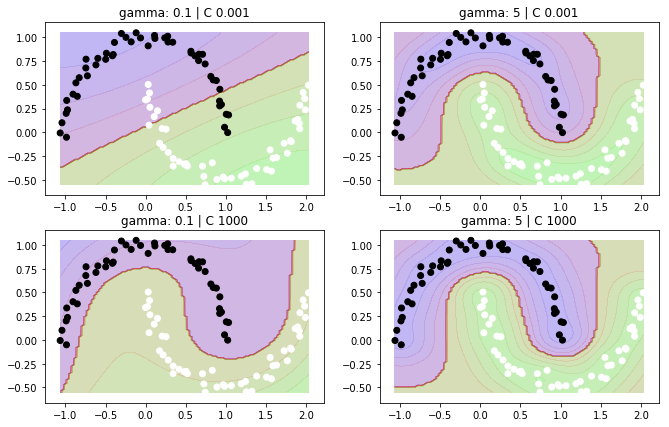

In [13]:
moons = make_moons(noise = 0.05)
x = moons[0]
y = moons[1]

plt.figure(figsize = (11,7))
plt.subplot(221)
plot_rbf_kernel(x,y, 0.1, 0.001)
plt.subplot(222)
plot_rbf_kernel(x,y, 5, 0.001)
plt.subplot(223)
plot_rbf_kernel(x,y,0.1, 1000)
plt.subplot(224)
plot_rbf_kernel(x,y, 5, 1000)
plt.show()

Many kernels to choose from. Best to try linear first (LinearSVC is faster than SVC(kernel = "linear")). Then try gaussian rbf. THen more with grid search if time and computational power allows.

#### Computational complexity

![complexity](05-img01.png)



### SVM Regression

Similar concept, but tries to design boundary such that as many points as possible are near the boundary (on the road).

Can use linear svm regression for linear data

In [16]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(x,y)

# Or for non-linear regression, use SVR

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon =0.1)
svm_poly_reg.fit(x,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)